In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Small Sample for Understanding the Decision Tree**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

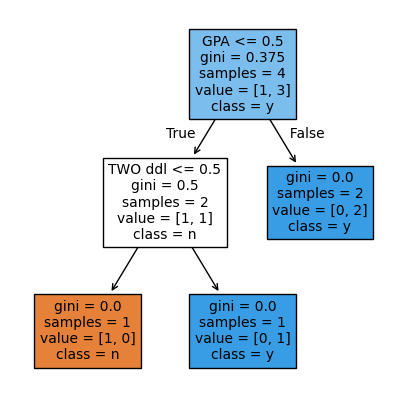

In [ ]:
# small sample size to test the decision tree
ddl = pd.DataFrame()
ddl['GPA']       = [1, 0, 0, 1] # GPA higher than 3.6
ddl['TWO ddl']   = [1, 1, 0, 0] # more than TWO ddl at that week
ddl['exam']      = [0, 1, 1, 1] # having exam that week
ddl['finishing'] = ['y', 'y', 'n', 'y'] # finishing ddl on time or not

tree = DecisionTreeClassifier(max_depth = 6)

X = ddl[['GPA', 'TWO ddl', 'exam']]
Y = ddl['finishing']
tree.fit(X, Y)
plt.figure(figsize = (5,5))
plot_tree(tree, filled = True, fontsize = 10, feature_names = ['GPA', 'TWO ddl', 'exam'], class_names = ['n', 'y'])
plt.show()

# **Apply using Skiing Dataset** (Medium Data Volumn)




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## 1. Loading Data

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Yi XinY/Math306/Ski+Resorts/resorts.csv', encoding='ISO-8859-1')

## 2. Basic Understanding of the Dataset

In [ ]:
df.columns = df.columns.str.strip()
df

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,...,325,15,6,0,21,22921,Yes,Yes,Yes,No
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,...,100,18,6,0,24,14225,Yes,Yes,Yes,No
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,...,123,4,4,3,11,16240,Yes,No,No,No
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,...,0,2,5,1,8,9200,Yes,Yes,Yes,No
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,...,150,14,3,1,18,21060,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Puigmal,42.395007,2.108883,France,Europe,0,Unknown,2700,1830,...,0,11,2,0,13,11865,Yes,No,No,No
495,496,Kranzberg-Mittenwald,47.451359,11.228630,Germany,Europe,29,December,1350,980,...,8,9,1,0,10,5850,Yes,Yes,Yes,No
496,497,Wetterstein lifts-Wettersteinbahnen- Ehrwald,47.406897,10.927998,Austria,Europe,43,December - March,1530,1000,...,33,6,4,0,10,5425,Yes,Yes,No,No
497,498,Stuhleck-Spital am Semmering,47.574195,15.789964,Austria,Europe,42,April,1774,777,...,240,7,2,0,9,14400,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   499 non-null    int64  
 1   Resort               499 non-null    object 
 2   Latitude             499 non-null    float64
 3   Longitude            499 non-null    float64
 4   Country              499 non-null    object 
 5   Continent            499 non-null    object 
 6   Price                499 non-null    int64  
 7   Season               499 non-null    object 
 8   Highest point        499 non-null    int64  
 9   Lowest point         499 non-null    int64  
 10  Beginner slopes      499 non-null    int64  
 11  Intermediate slopes  499 non-null    int64  
 12  Difficult slopes     499 non-null    int64  
 13  Total slopes         499 non-null    int64  
 14  Longest run          499 non-null    int64  
 15  Snow cannons         499 non-null    int

In [ ]:
df.describe()

,ID,Latitude,Longitude,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,43.205684,-6.006784,48.721443,2160.589178,1200.631263,31.819639,37.921844,16.164329,85.905812,3.545090,179.136273,11.282565,9.721443,3.258517,24.262525,31650.961924
std,144.193157,15.975790,59.990459,21.718733,774.339805,596.142294,47.401764,44.358524,20.115855,100.874157,3.947887,372.321111,13.365360,11.461502,5.867967,27.672736,40781.986019
min,1.000000,-45.054960,-149.740657,0.000000,163.000000,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.500000,43.672650,1.380975,36.000000,1594.000000,800.000000,10.000000,12.000000,3.000000,30.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,11645.000000
50%,250.000000,46.347316,8.206372,45.000000,2175.000000,1121.000000,18.000000,25.000000,9.000000,55.000000,3.000000,15.000000,7.000000,6.000000,1.000000,15.000000,18510.000000
75%,374.500000,47.327089,12.429237,54.000000,2700.000000,1500.000000,30.000000,45.000000,21.000000,100.000000,6.000000,180.000000,14.000000,11.500000,4.000000,26.000000,32829.000000
max,499.000000,67.784406,176.876668,141.000000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,16.000000,2383.000000,89.000000,74.000000,40.000000,174.000000,252280.000000


## 3. Dealing with Missing Data

In [ ]:
print(df.isnull().any()) # False represent there is no missing values in that column.
print(df.shape[0])

ID                     False
Resort                 False
Latitude               False
Longitude              False
Country                False
Continent              False
Price                  False
Season                 False
Highest point          False
Lowest point           False
Beginner slopes        False
Intermediate slopes    False
Difficult slopes       False
Total slopes           False
Longest run            False
Snow cannons           False
Surface lifts          False
Chair lifts            False
Gondola lifts          False
Total lifts            False
Lift capacity          False
Child friendly         False
Snowparks              False
Nightskiing            False
Summer skiing          False
dtype: bool
499


## 4. Visualization

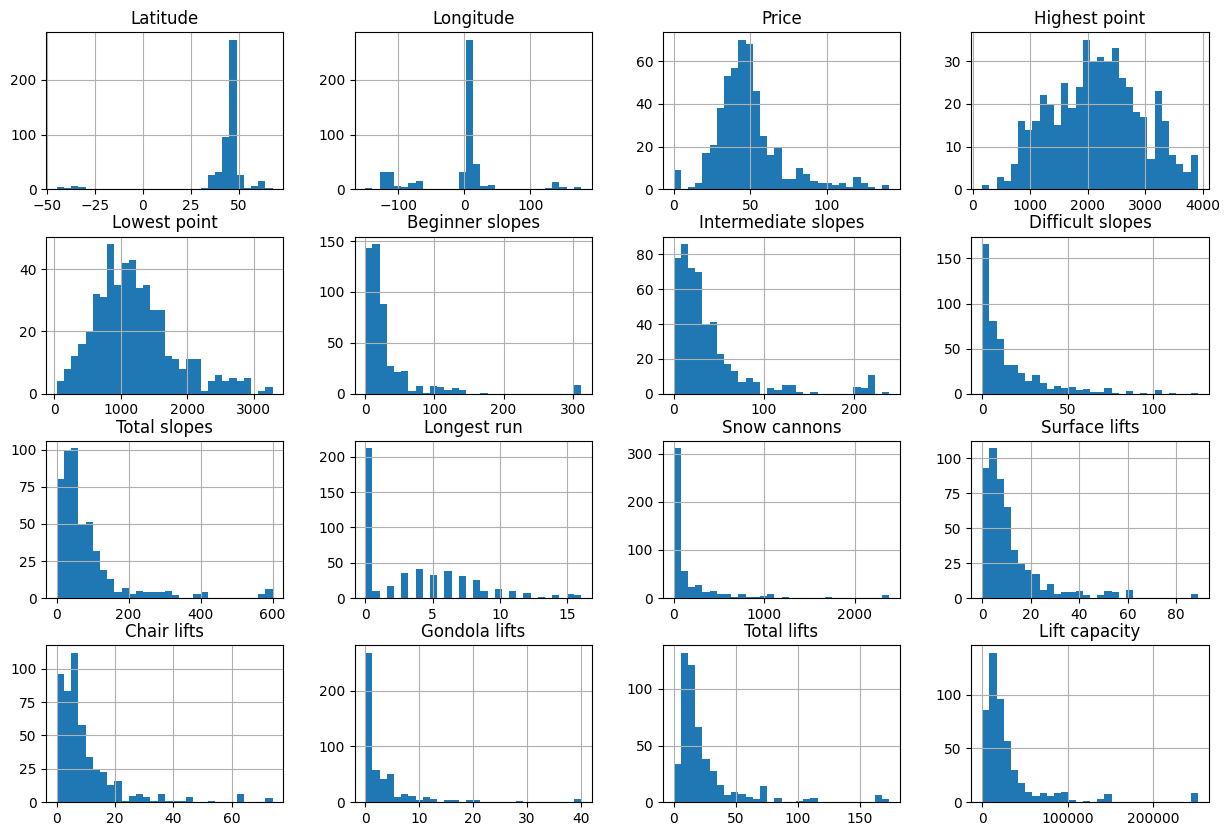

In [ ]:
NUMERICAL_COLS = [
    'Latitude', 'Longitude', 'Price', 'Highest point', 'Lowest point',
    'Beginner slopes', 'Intermediate slopes', 'Difficult slopes', 'Total slopes', 'Longest run', 'Snow cannons',
    'Surface lifts', 'Chair lifts', 'Gondola lifts', 'Total lifts', 'Lift capacity'
]
# visualize numerical features
df[NUMERICAL_COLS].hist(bins = 30, figsize = (15, 10))
plt.show()

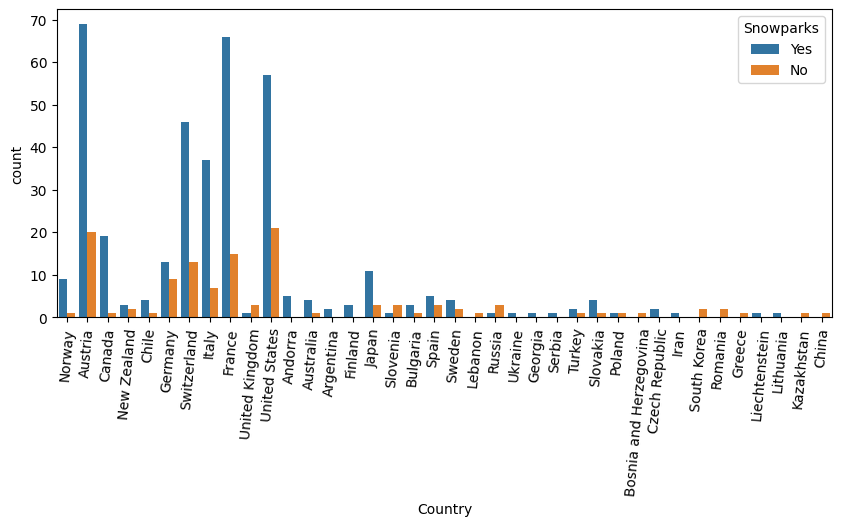

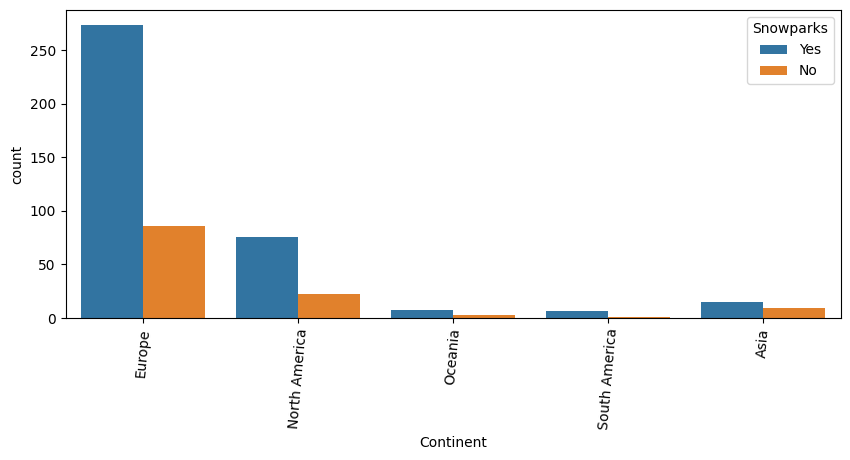

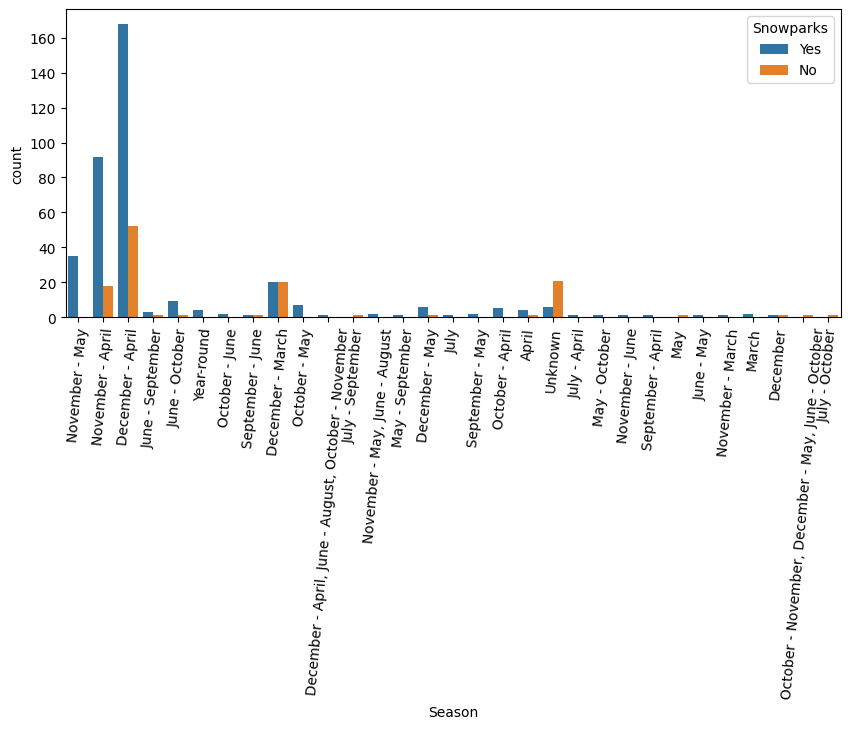

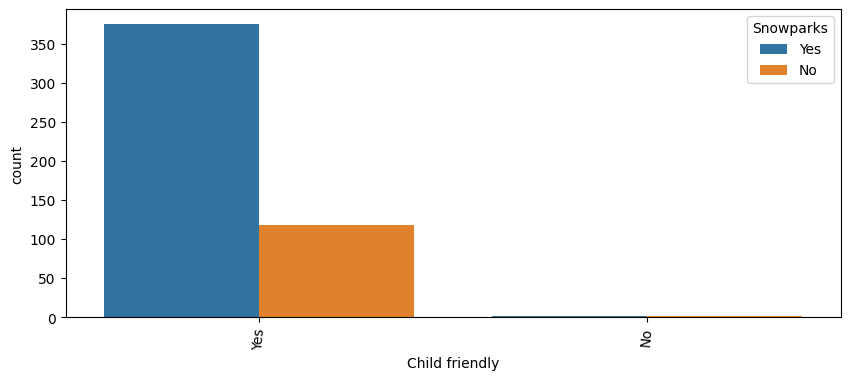

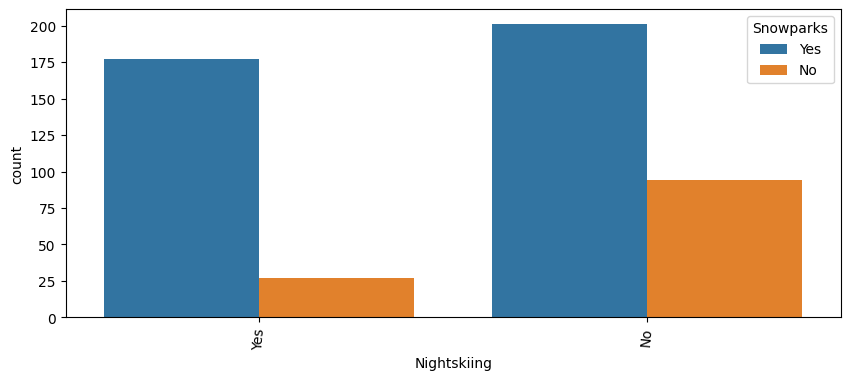

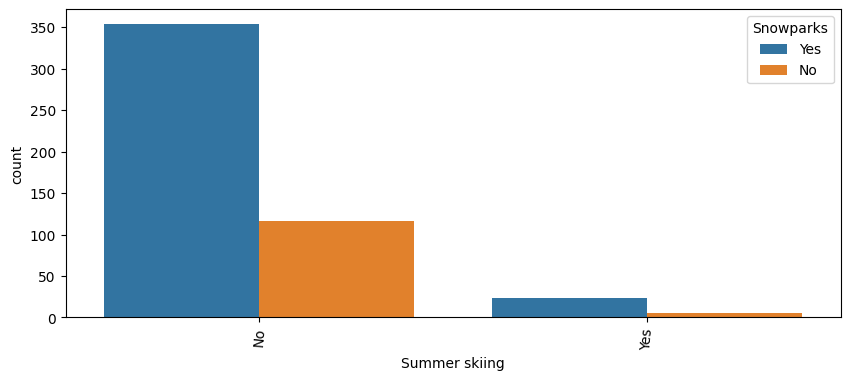

In [ ]:
CATEGORICAL_COLS = [
    'Country', 'Continent', 'Season',
    'Child friendly', 'Nightskiing', 'Summer skiing'
]
# visualize categorical features
for col in CATEGORICAL_COLS:
    plt.figure(figsize = (10, 4))
    sns.countplot(x = col, hue = 'Snowparks', data = df)
    plt.xticks(rotation = 85)
    plt.show()

## 5. Data CLeanup + Transform

In [ ]:
# convert a binary 'Child friendly' column 0 (No) and 1 (Yes)
df['Snowparks'] = df['Snowparks'].apply(lambda x: 1 if x.strip() == 'Yes' else 0)
print(df['Snowparks'].unique())

[1 0]


In [ ]:
# convert all object-type columns to category type (int64)
for col in df.select_dtypes(include = 'object').columns:
    df[col] = df[col].astype('category').cat.codes
print(df.dtypes)

ID                       int64
Resort                   int16
Latitude               float64
Longitude              float64
Country                   int8
Continent                 int8
Price                    int64
Season                    int8
Highest point            int64
Lowest point             int64
Beginner slopes          int64
Intermediate slopes      int64
Difficult slopes         int64
Total slopes             int64
Longest run              int64
Snow cannons             int64
Surface lifts            int64
Chair lifts              int64
Gondola lifts            int64
Total lifts              int64
Lift capacity            int64
Child friendly            int8
Snowparks                int64
Nightskiing               int8
Summer skiing             int8
dtype: object


In [ ]:
# select relevant numerical columns
numeric_columns = df.drop(['Snowparks', 'ID', 'Resort'], axis = 1).columns


# display the first few rows of the dataset
print(df[numeric_columns].head())
print()

    Latitude   Longitude  Country  Continent  Price  Season  Highest point  \
0  60.928244    8.383487       23          1     46      20           1450   
1  60.534526    8.206372       23          1     44      17           1178   
2  47.057810    9.828167        3          1     48       2           2110   
3  49.105520 -117.846280        6          2     60       2           2075   
4  61.230369   10.529014       23          1     45      17           1030   

   Lowest point  Beginner slopes  Intermediate slopes  ...  Longest run  \
0           620               29                   10  ...            6   
1           800               18                   12  ...            2   
2           650               13                   12  ...            9   
3          1185               20                   50  ...            7   
4           195               33                    7  ...            6   

   Snow cannons  Surface lifts  Chair lifts  Gondola lifts  Total lifts  \
0    

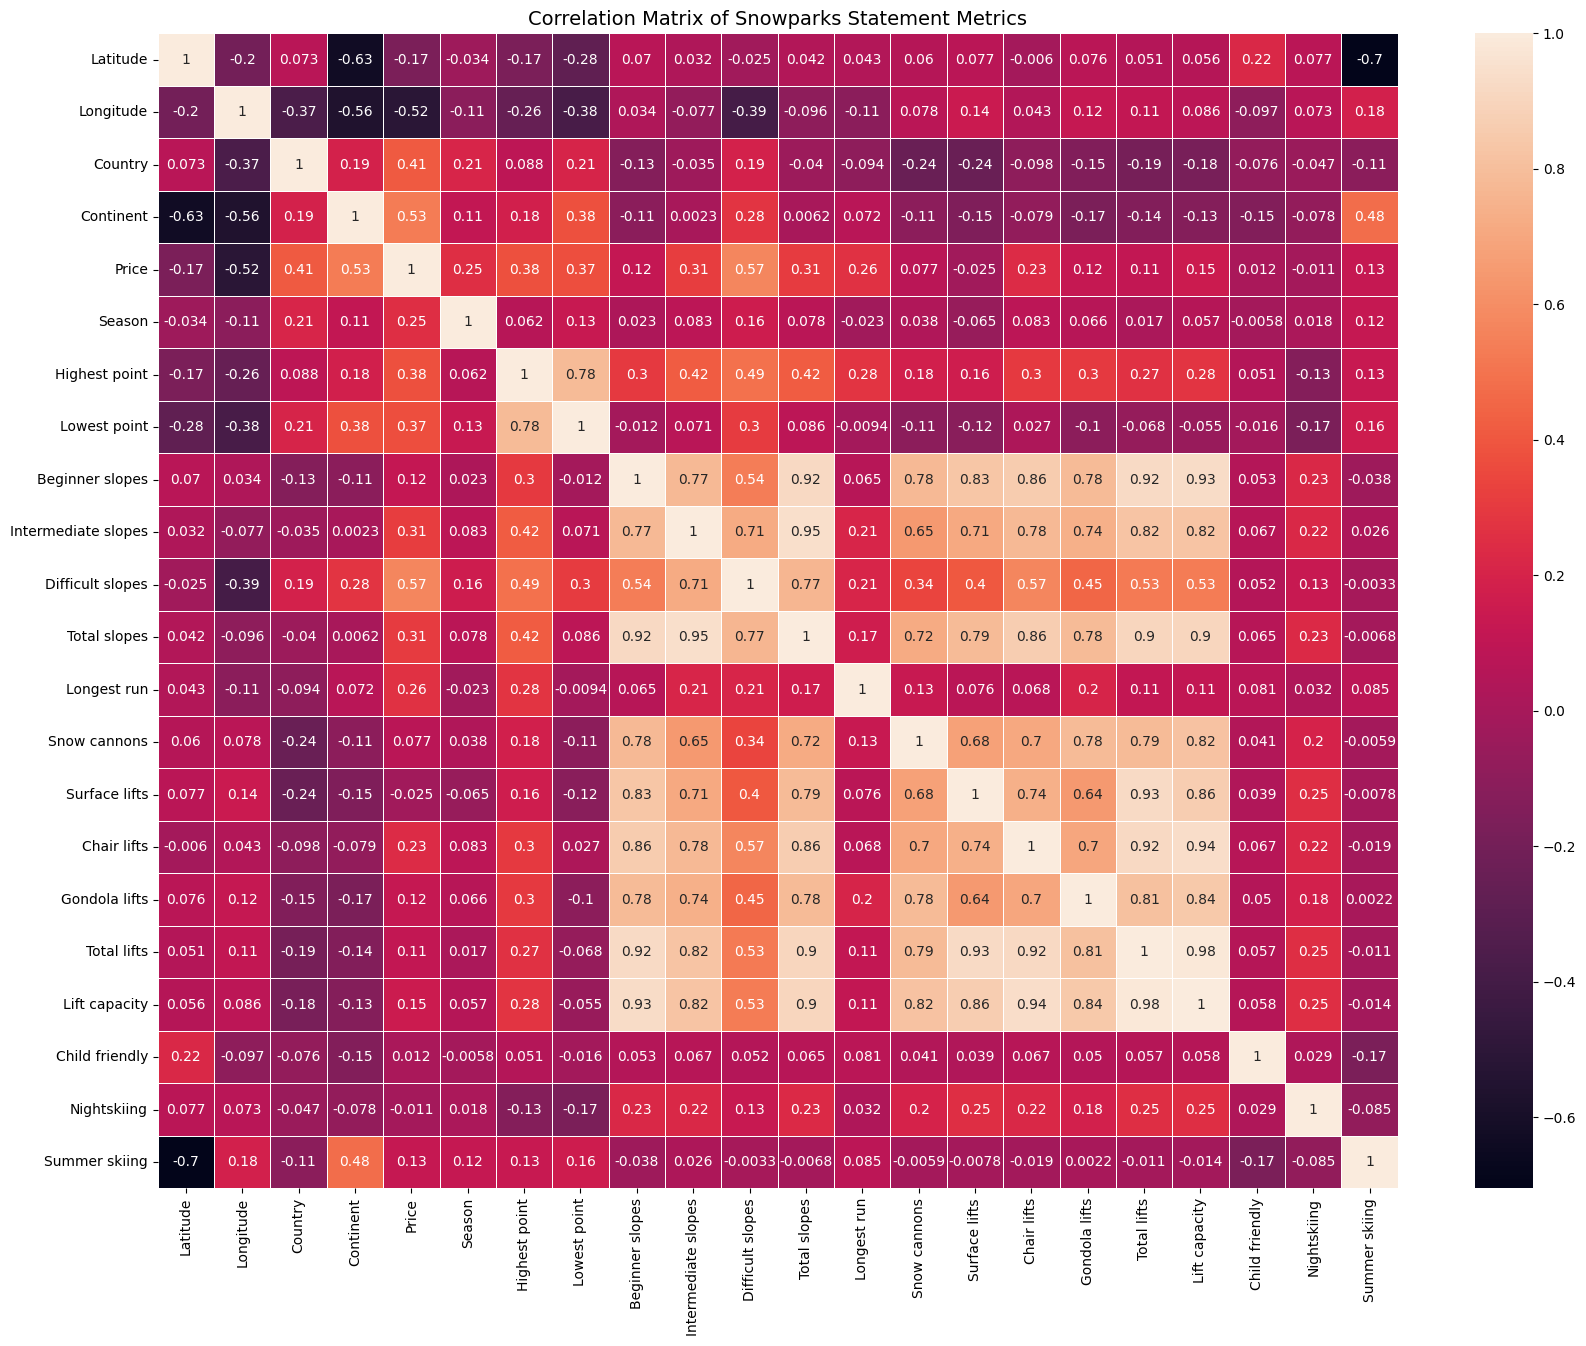

In [ ]:
# calculate the correlation matrix for selected numerical columns in df
correlation_matrix = df[numeric_columns].corr()

# create a heatmap of the correlation matrix
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot = True, linewidths = 0.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Snowparks Statement Metrics', fontsize = 14)
plt.show()

## 6. Data Spliting

In [ ]:
X = df.drop(['Snowparks', 'ID', 'Resort', 'Season'], axis = 1)
y = df['Snowparks']

# 80 percent used for model training and 20 percent for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 7. Train Decision Tree Classifier

Single Decision Tree Accuracy: 0.83
Classification Report (Tree):
               precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.88      0.91      0.89        77

    accuracy                           0.83       100
   macro avg       0.76      0.74      0.75       100
weighted avg       0.82      0.83      0.83       100



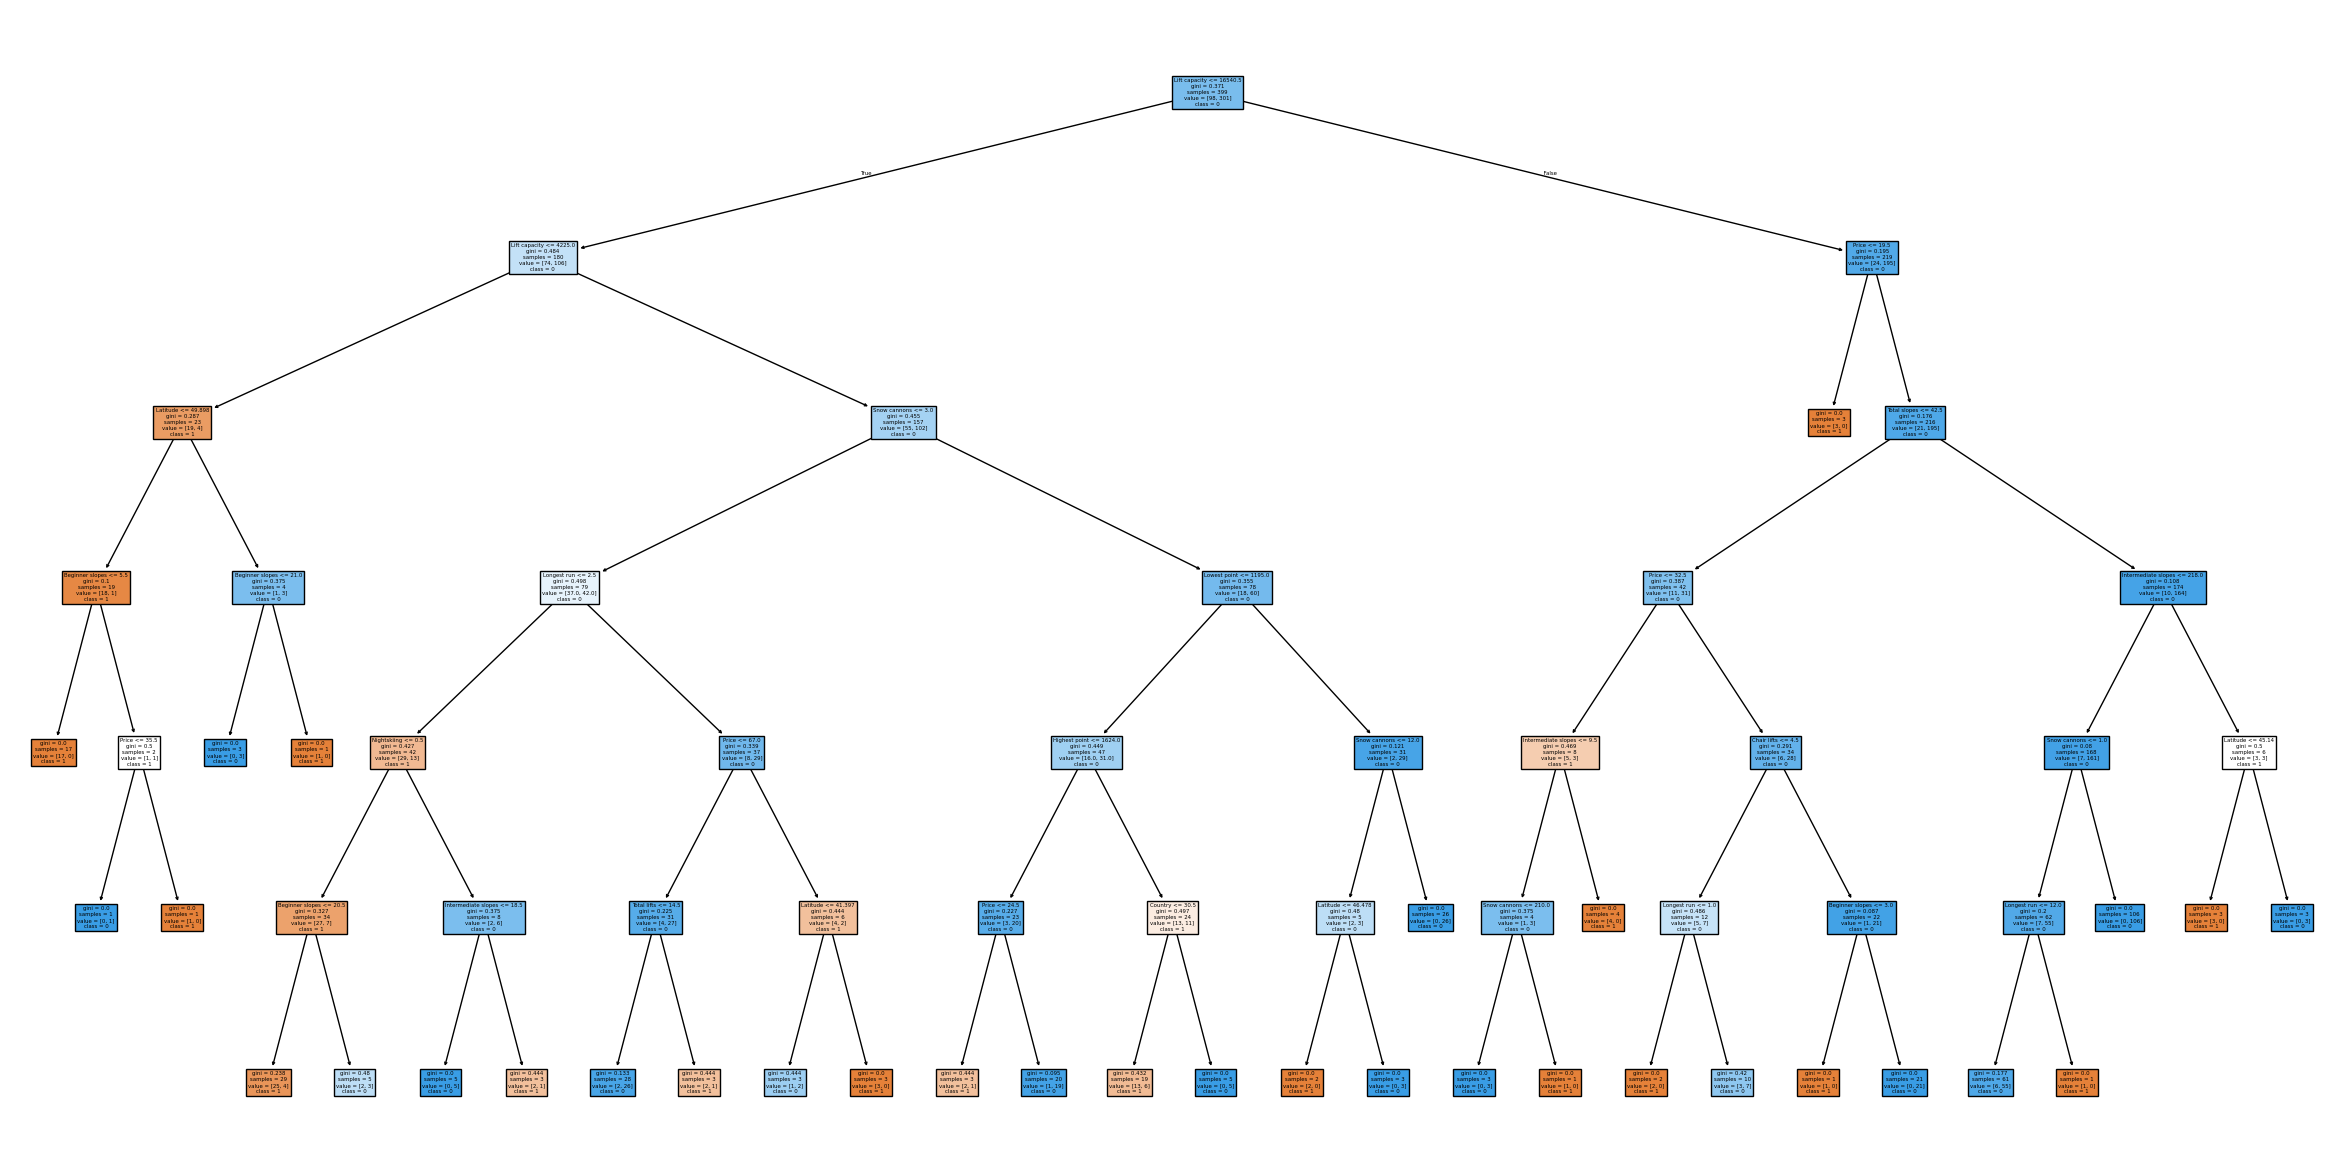

In [ ]:
# single decision tree
dtree = DecisionTreeClassifier(max_depth = 6)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("Single Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report (Tree):\n", classification_report(y_test, y_pred_tree))

'''
# plt.figure(figsize = (30, 15))
# plot_tree(
    # dtree,
    # feature_names = X.columns,
    # class_names = df['Snowparks'].unique().astype(str),
    # filled = True
)
# plt.show()
'''

Random Forest Accuracy: 0.86
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.91      0.43      0.59        23
           1       0.85      0.99      0.92        77

    accuracy                           0.86       100
   macro avg       0.88      0.71      0.75       100
weighted avg       0.87      0.86      0.84       100



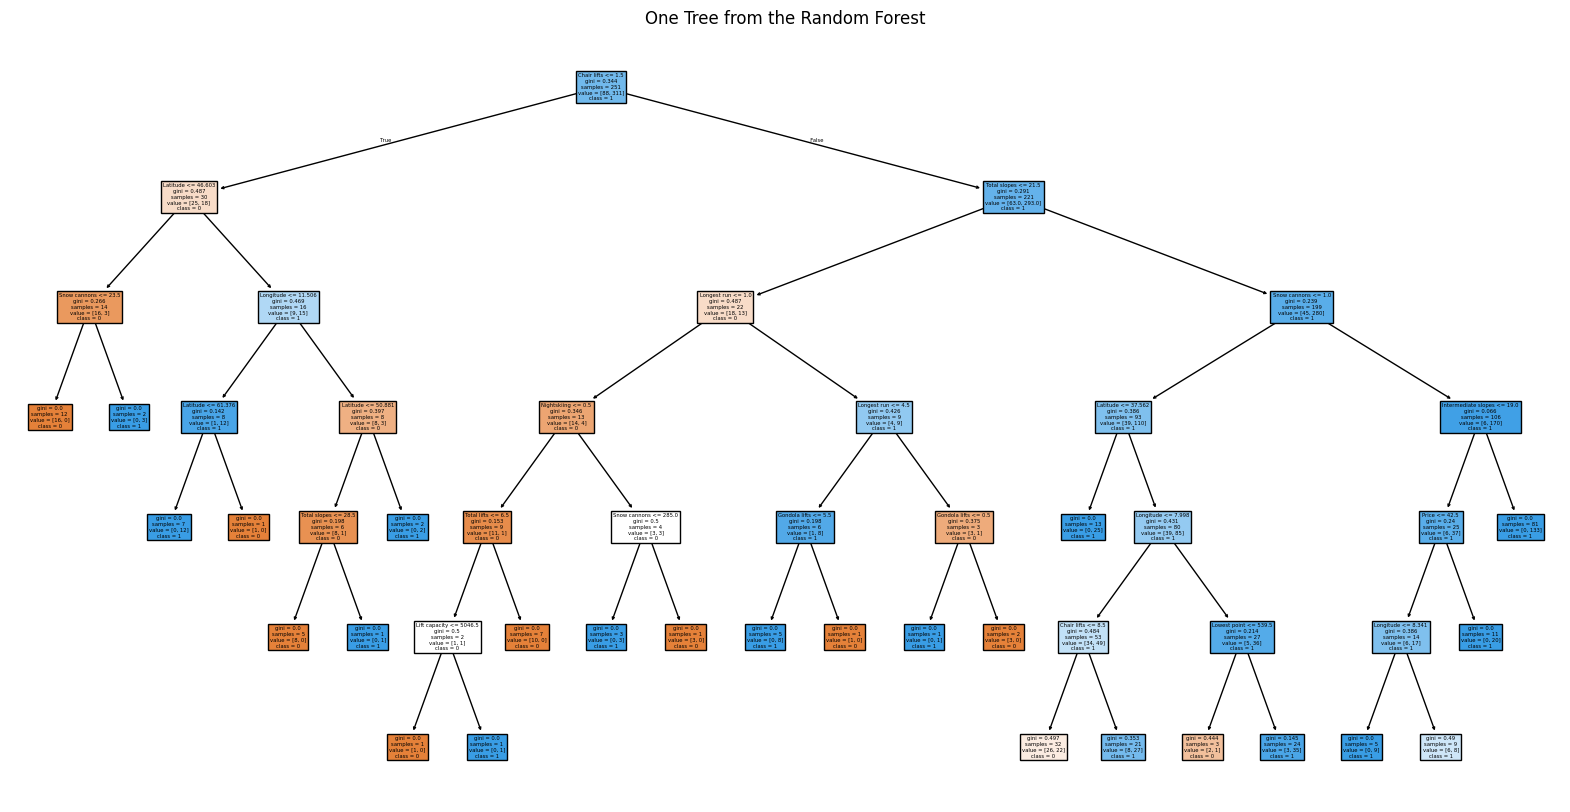

In [ ]:
# random forest
rforest = RandomForestClassifier(max_depth = 6)
rforest.fit(X_train, y_train)
y_pred_forest = rforest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_forest))

'''
# estimator = rforest.estimators_[0] # pick one tree from the Random Forest (the first one)

# plt.figure(figsize = (20, 10))
# plot_tree(estimator,
          # feature_names = X.columns,
          # class_names = df['Snowparks'].unique().astype(str),
          # filled = True)
# plt.title("One Tree from the Random Forest")
# plt.show()
'''

# **Apply using Boring Income Dataset** (Large Data Volumn)




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## 1. Loading Data

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Yi XinY/Math306/adult-census-income.csv')

## 2. Basic Understanding of the Dataset

In [ ]:
df.columns = df.columns.str.strip()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## 3. Dealing with Missing Data

In [ ]:
df.replace(" ?", np.nan, inplace = True) # the missing values are trading as " ?" in the data  =>  replace " ?" to NaN
print(df.isnull().any()) # False represent there is no missing values in that column.

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class             False
dtype: bool


In [ ]:
# drop the rows including the missing data
df.dropna(inplace = True)

# print how many rows left after deleting the missing data
print("Rows remaining after dropping those with ' ?':", df.shape[0])

Rows remaining after dropping those with ' ?': 45222


## 4. Visualization

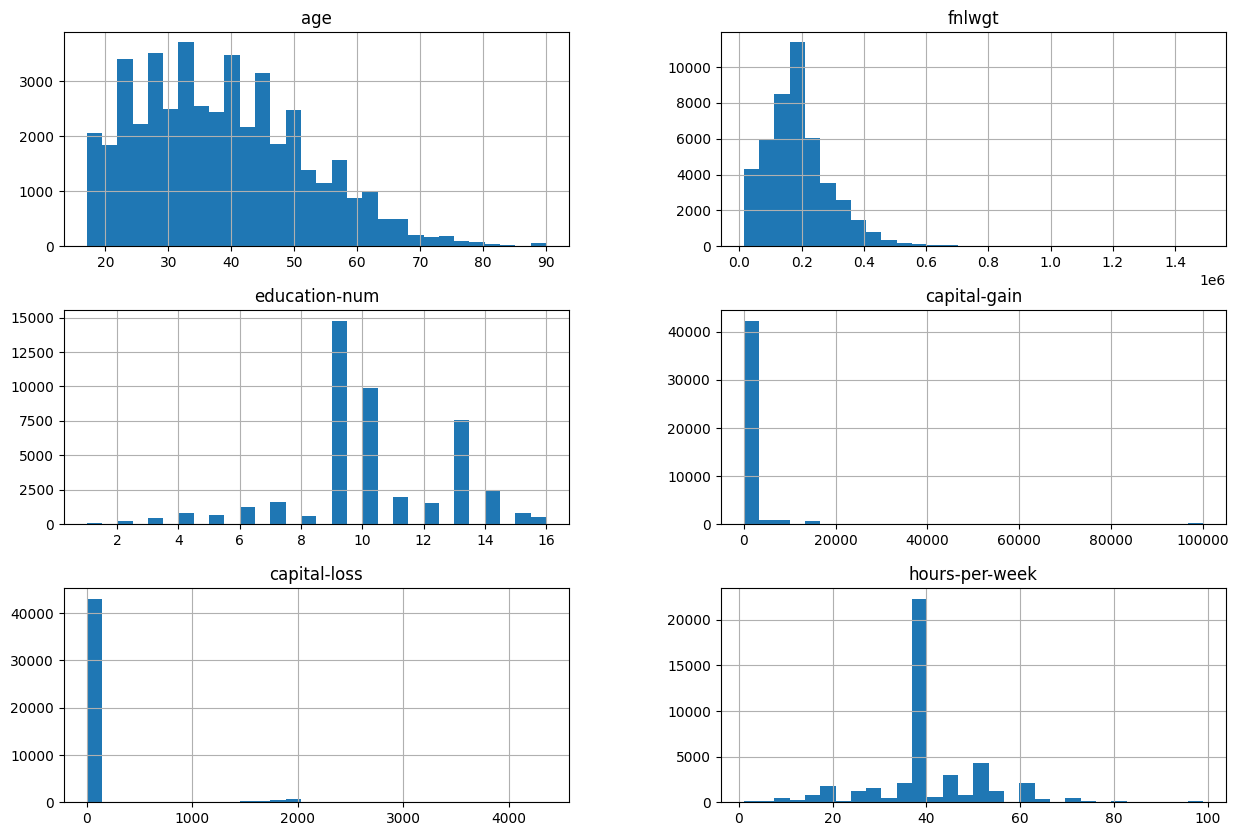

In [ ]:
NUMERICAL_COLS = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
# visualize numerical features
df[NUMERICAL_COLS].hist(bins = 30, figsize = (15, 10))
plt.show()

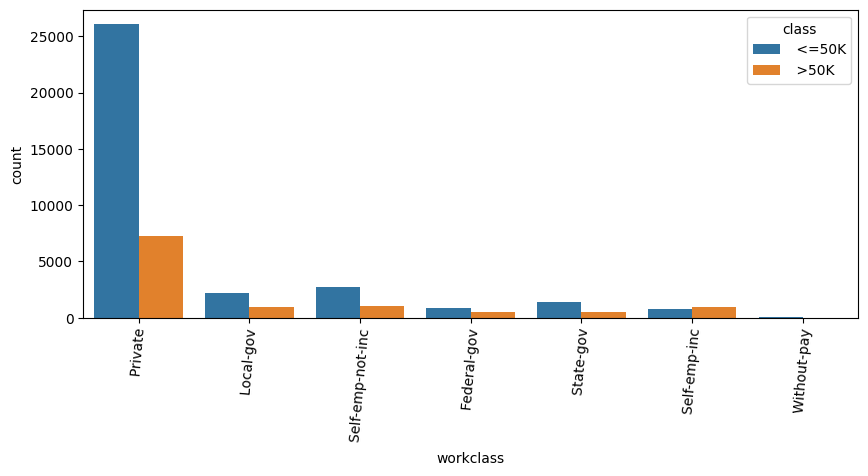

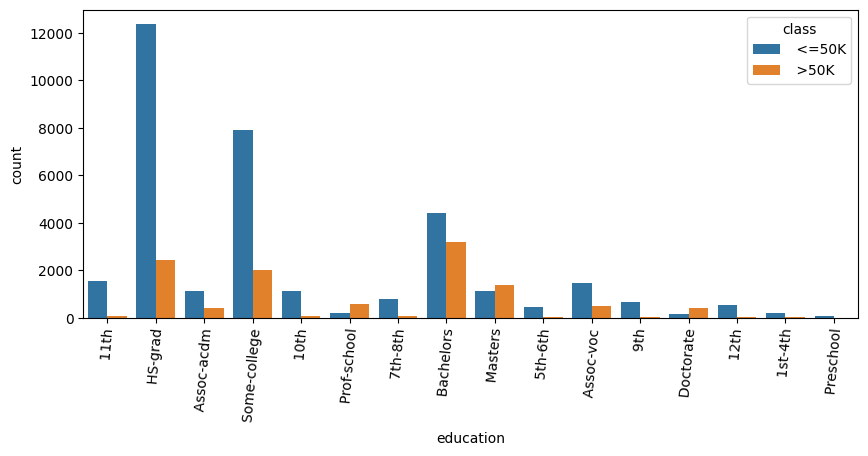

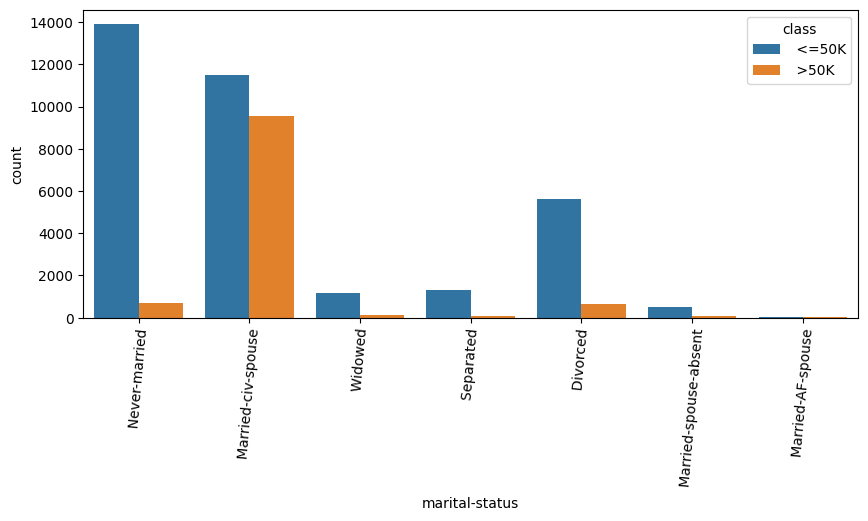

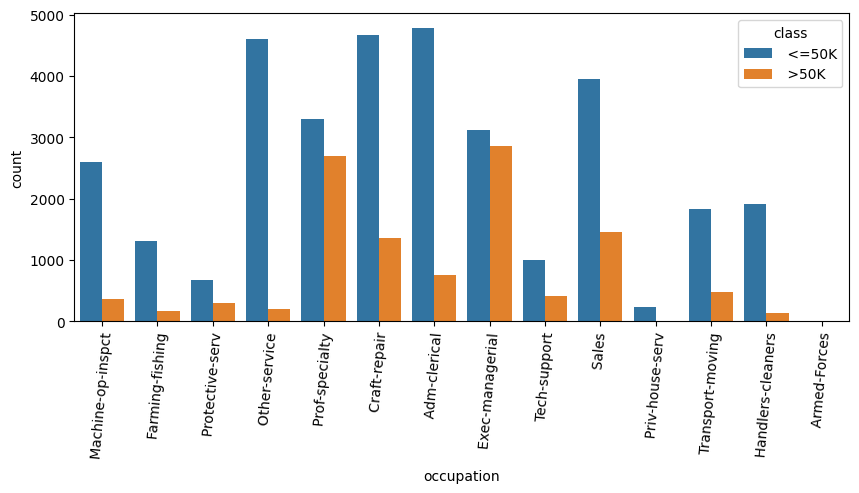

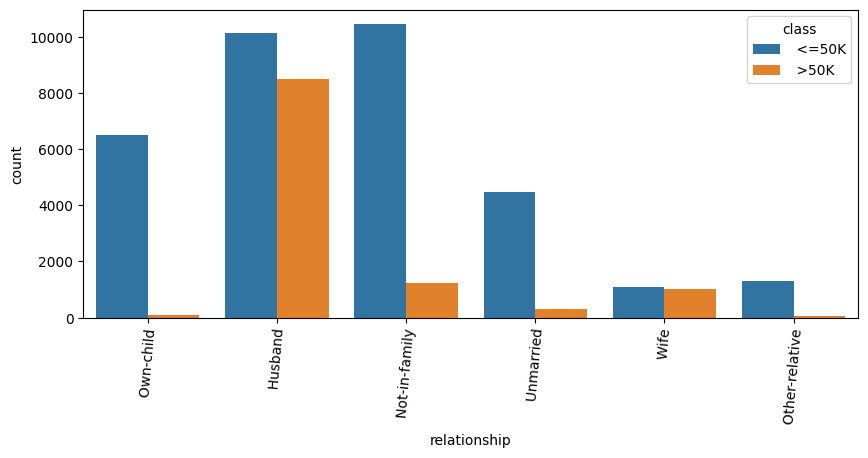

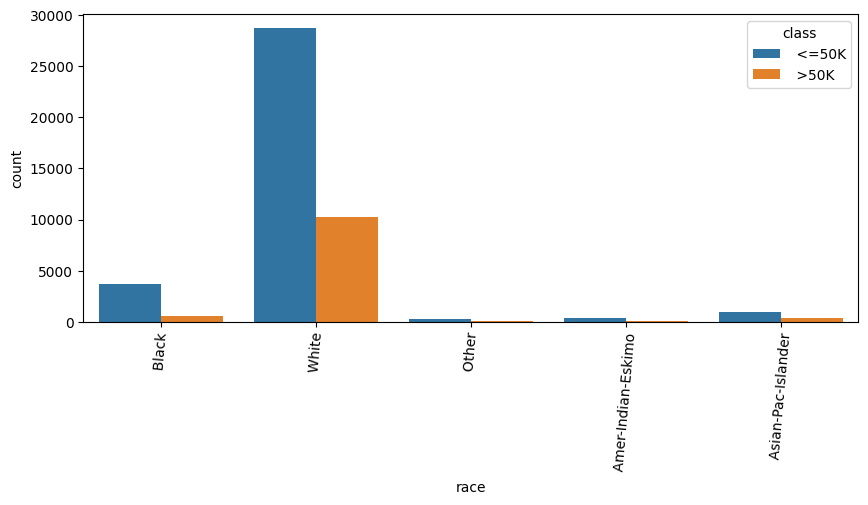

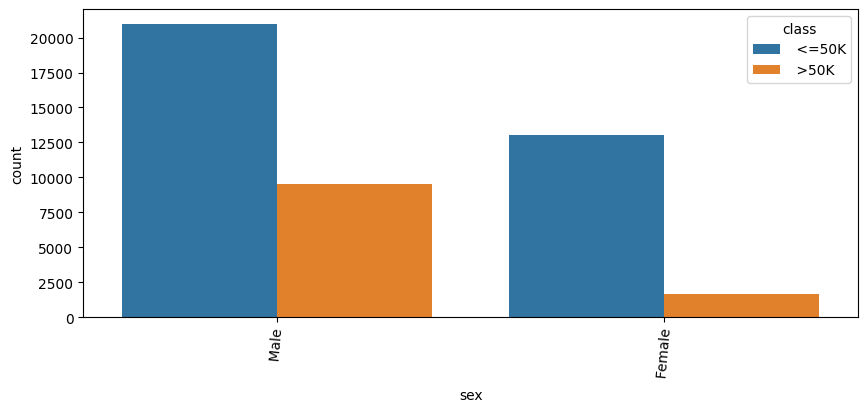

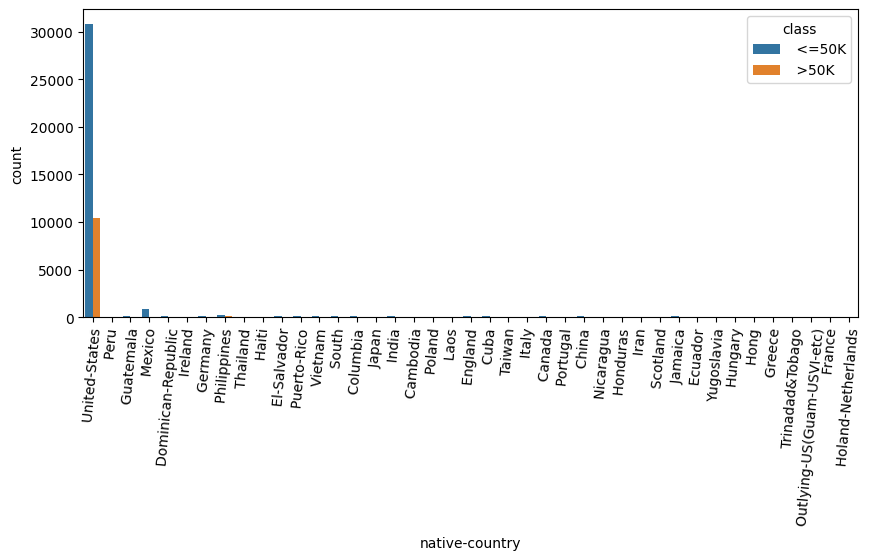

In [ ]:
CATEGORICAL_COLS=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
# visualize categorical features
for col in CATEGORICAL_COLS:
    plt.figure(figsize = (10, 4))
    sns.countplot(x = col, hue = 'class', data = df)
    plt.xticks(rotation = 85)
    plt.show()

## 5. Data CLeanup + Transform

In [ ]:
# convert a binary 'Income' column 0 (<=50k) and 1 (>50k)
df['class'] = df['class'].apply(lambda x: 0 if x.strip() == '<=50K' else 1)
print(df['class'].unique())

[0 1]


In [ ]:
# convert all object-type columns to category type (int64)
for col in df.select_dtypes(include = 'object').columns:
    df[col] = df[col].astype('category').cat.codes
print(df.dtypes)

age               int64
workclass          int8
fnlwgt            int64
education          int8
education-num     int64
marital-status     int8
occupation         int8
relationship       int8
race               int8
sex                int8
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country     int8
class             int64
dtype: object


In [ ]:
# select relevant numerical columns
numeric_columns = df.drop('class', axis = 1).columns

# display the first few rows of the dataset
print(df[numeric_columns].head())
print()

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   25          2  226802          1              7               4   
1   38          2   89814         11              9               2   
2   28          1  336951          7             12               2   
3   44          2  160323         15             10               2   
5   34          2  198693          0              6               4   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           6             3     2    1             0             0   
1           4             0     4    1             0             0   
2          10             0     4    1             0             0   
3           6             0     2    1          7688             0   
5           7             1     4    1             0             0   

   hours-per-week  native-country  
0              40              38  
1              50              38  
2              40              38  
3       

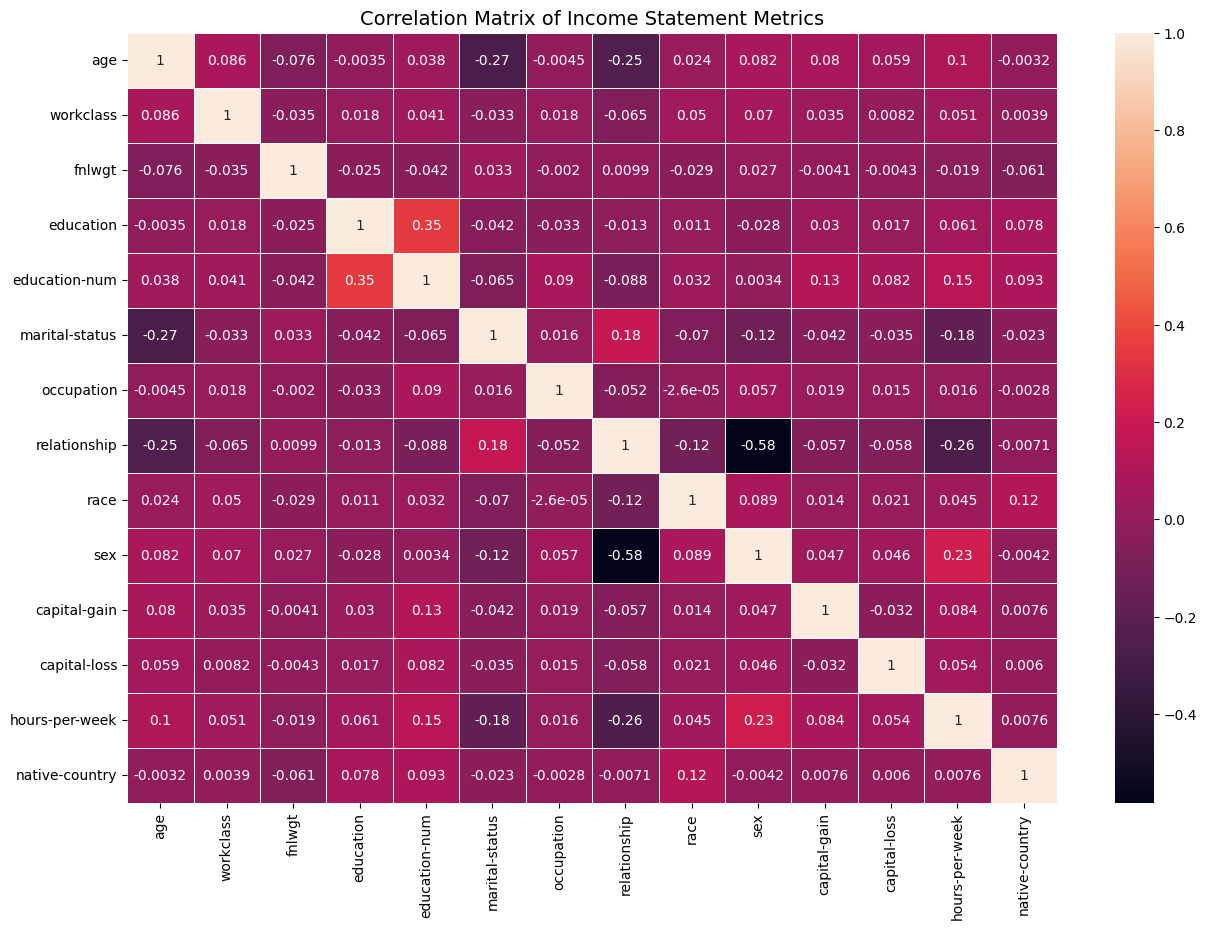

In [ ]:
# calculate the correlation matrix for selected numerical columns in df
correlation_matrix = df[numeric_columns].corr()

# create a heatmap of the correlation matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, linewidths = 0.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Income Statement Metrics', fontsize = 14)
plt.show()

## 6. Data Spliting

In [ ]:
X = df.drop('class', axis = 1)
y = df['class']

# 80 percent used for model training and 20 percent for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 7. Train Decision Tree Classifier

In [ ]:
# single decision tree
dtree = DecisionTreeClassifier(max_depth = 6)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("Single Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report (Tree):\n", classification_report(y_test, y_pred_tree))

'''
# plt.figure(figsize = (30, 15))
# plot_tree(
    # dtree,
    # feature_names = X.columns,
    # class_names = df['Snowparks'].unique().astype(str),
    # filled = True
)
# plt.show()
'''

Single Decision Tree Accuracy: 0.8453289110005527
Classification Report (Tree):
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      6772
           1       0.77      0.55      0.64      2273

    accuracy                           0.85      9045
   macro avg       0.82      0.75      0.77      9045
weighted avg       0.84      0.85      0.84      9045



"\n# plt.figure(figsize = (30, 15))\n# plot_tree(\n    # dtree,\n    # feature_names = X.columns,\n    # class_names = df['Snowparks'].unique().astype(str), \n    # filled = True\n)\n# plt.show()\n"

In [ ]:
# random forest
rforest = RandomForestClassifier(max_depth = 6)
rforest.fit(X_train, y_train)
y_pred_forest = rforest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_forest))

'''
# estimator = rforest.estimators_[0] # pick one tree from the Random Forest (the first one)

# plt.figure(figsize = (20, 10))
# plot_tree(estimator,
          # feature_names = X.columns,
          # class_names = df['class'].unique().astype(str),
          # filled = True)
# plt.title("One Tree from the Random Forest")
# plt.show()
'''


Random Forest Accuracy: 0.8477611940298507
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      6772
           1       0.80      0.53      0.63      2273

    accuracy                           0.85      9045
   macro avg       0.83      0.74      0.77      9045
weighted avg       0.84      0.85      0.84      9045



'\n# estimator = rforest.estimators_[0] # pick one tree from the Random Forest (the first one)\n\n# plt.figure(figsize = (20, 10))\n# plot_tree(estimator, \n          # feature_names = X.columns, \n          # class_names = df[\'class\'].unique().astype(str), \n          # filled = True)\n# plt.title("One Tree from the Random Forest")\n# plt.show()\n'